In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

%matplotlib inline

torch.Size([60000, 28, 28])
torch.Size([60000])


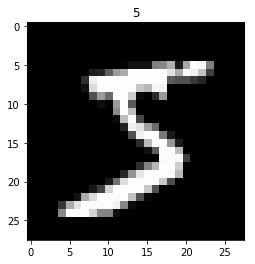

In [2]:
# Hyper Parameter
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
# if you want to download the MNIST data, change the DOWNLOAD_MNIST to True
DOWNLOAD_MNIST = False

train_data = torchvision.datasets.MNIST(
    root='./data/mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)

print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [4]:
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

test_data = torchvision.datasets.MNIST(root='./data/mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1) \
                .type(torch.FloatTensor)[:2000] / 255.
test_y = test_data.test_labels[:2000]

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # input size: (1, 28, 28)
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, # 输入层的高度
                out_channels=16, # 卷积filter的个数，也就是输出层的高度
                kernel_size=5, # 卷积层的size是5*5
                stride=1, # 步长
                padding=2, # 外加0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        # output size of conv1: (16, 14, 14)
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # output size of conv2: (32, 7, 7)
        self.out = nn.Linear(32 * 7 * 7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1) # 展平
        output = self.out(x)
        return output, x

cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [11]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

I:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch:  0 | train loss: 2.2605 | test accuracy: 0.22


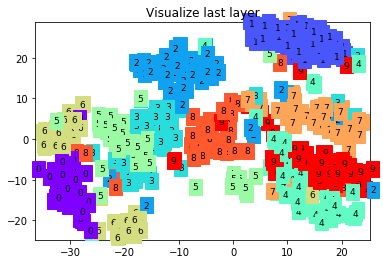

Epoch:  0 | train loss: 0.2984 | test accuracy: 0.89


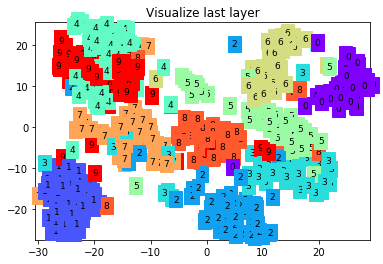

Epoch:  0 | train loss: 0.1377 | test accuracy: 0.94


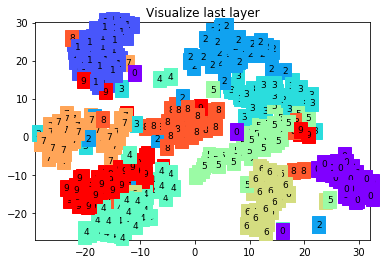

Epoch:  0 | train loss: 0.0630 | test accuracy: 0.95


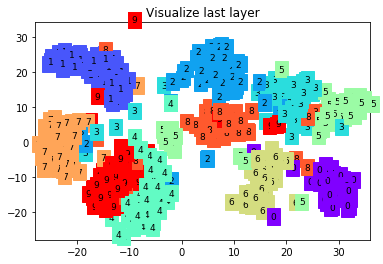

Epoch:  0 | train loss: 0.4200 | test accuracy: 0.96


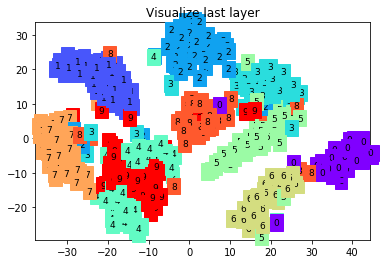

Epoch:  0 | train loss: 0.0513 | test accuracy: 0.97


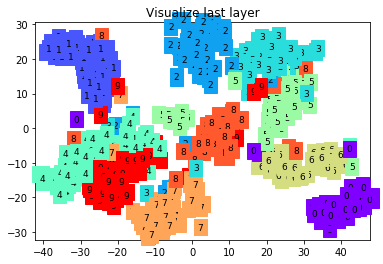

Epoch:  0 | train loss: 0.0318 | test accuracy: 0.96


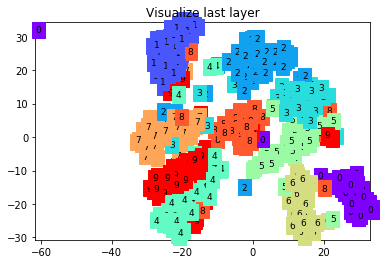

Epoch:  0 | train loss: 0.1100 | test accuracy: 0.96


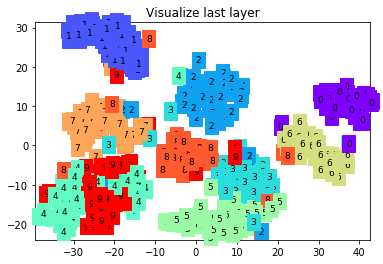

Epoch:  0 | train loss: 0.0330 | test accuracy: 0.98


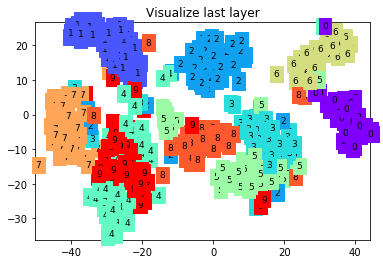

Epoch:  0 | train loss: 0.0180 | test accuracy: 0.98


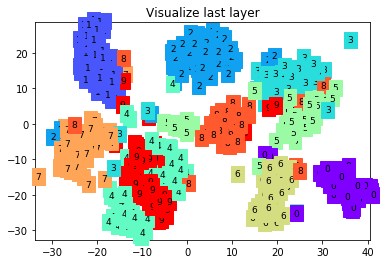

Epoch:  0 | train loss: 0.0891 | test accuracy: 0.97


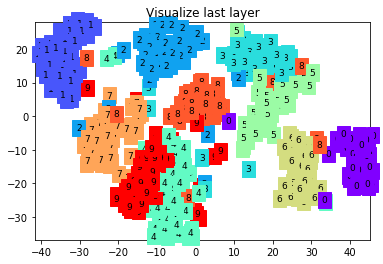

Epoch:  0 | train loss: 0.0859 | test accuracy: 0.97


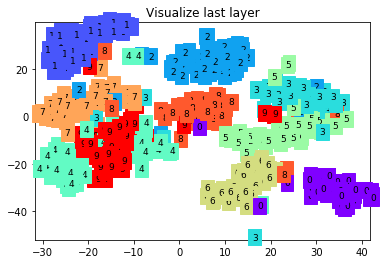

In [ ]:
from matplotlib import cm
from sklearn.manifold import TSNE
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9))
        plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.title('Visualize last layer')
    plt.show()
    plt.pause(0.01)
    
plt.ion()

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = x
        b_y = y
        
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(step % 100 == 0):
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.item(), '| test accuracy: %.2f' % accuracy)
            
            tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
            plot_only = 500
            low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
            labels = test_y.numpy()[:plot_only]
            plot_with_labels(low_dim_embs, labels)
            
plt.ioff()

In [ ]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')